# UASB03 - NY Times Comments

## Description des données

### Articles
Nous chargeons tout d'abord les articles rédigés dans le New York Times entre janvier et mai 2017.

#### Descriptions des variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

data_dir = 'C:\\Users\\julien.piquot\\workspace\\nyt-comments\\data\\'
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

def read_all_csv(pattern):
    allFiles = glob.glob(data_dir + pattern)
    frame = pd.DataFrame()
    list_ = []
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, header=0, parse_dates=['pubDate'], date_parser=dateparse)
        list_.append(df)
    frame = pd.concat(list_, sort=True)
    return frame

In [2]:

articles = read_all_csv('Articles*2017.csv')
articles.sample(2)


,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
288,NaN,58ed0c267c459f24986d9a37,1180,By PETE WELLS,article,Where a Chicken’s Parts Are Greater Than the Sum,"['Restaurants', 'Torishin (Manhattan, NY, Rest...",3,Dining,5,2017-04-11 17:02:23,Unknown,"At a yakitori restaurant in Hell’s Kitchen, ea...",The New York Times,Review,https://www.nytimes.com/2017/04/11/dining/tori...
472,NaN,58a6d87495d0e024746371b7,1214,By ALEXANDRA S. LEVINE and AMY ZERBA,article,Unknown,['New York City'],1,Metro,0,2017-02-17 11:03:09,Unknown,Friday: How children can celebrate the holiday...,The New York Times,briefing,https://www.nytimes.com/2017/02/17/nyregion/ne...


In [3]:
articles.shape

(4566, 16)

In [4]:
articles.describe(include = ['O']).transpose()

,count,unique,top,freq
abstract,156,151,Photos by The New York Times and by photograph...,4
articleID,4566,4548,5906e1f17c459f24986dd044,2
byline,4566,1520,By DEB AMLEN,160
documentType,4566,2,article,4410
headline,4566,4084,Unknown,314
keywords,4566,3752,[],295
newDesk,4566,35,OpEd,942
sectionName,4566,47,Unknown,3209
snippet,4566,4379,"Look closely at this image, stripped of its ca...",18
source,4566,2,The New York Times,4537


In [5]:
articles.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
articleWordCount,4566.0,1056.813403,817.325807,11.0,663.0,933.5,1264.0,12049.0
multimedia,4566.0,2.942838,7.316654,0.0,1.0,3.0,3.0,68.0
printPage,4566.0,7.440429,10.874987,0.0,0.0,1.0,12.0,94.0


Le tableau de données formé par les données provenant des articles contient 4566 individus et 16 variables. Certaines de ces variables sont des informations techniques qui présentent peu d'intérêt pour une étude. Les variables que nous jugeons "intéressantes" sont donc les suivantes :

Variables qualitatives nominales :
* documentType : 'article' ou 'blogpost'
* newDesk : la rubrique dans laquelle l'article a été publié (Sports, Culture, Editorial, etc.)
* sectionName : la section dans laquelle l'article a été publié (Tennis, Hockey, Media, Politics, Canada, etc.)
* source : 'The New York Times', 'International New York Times'
* typeOfMaterial : la nature de l'article (News, Blog, Editorial, Question, etc.)

Variables qualitatives ordinales :
* pubDate : la date de publication de l'article
* printPage : la page ou l'article a été imprimé

Variables quantitatives :
* articleWordCount : le nombre de terme de l'article complet

Autre type de variables (texte, JSON, liste)
* byline : autheur(s) de l'article
* headline : le titre de l'article
* keywords : la liste de mots clés associés à l'article au format JSON
* snippet : un court apperçu de l'article

##### Etude de la taille des articles

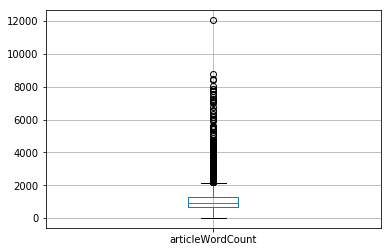

In [6]:
axes = articles.boxplot(column='articleWordCount')
plt.show()

La taille moyenne d'un article est d'environ 1057 mots tandis que la médianne se situe a environ 934 termes, nous constatons qu'au delà de 2000 termes, il existe un certain nombre d'article long mais qu'ils constituent une exception.

##### Etude de la numérotation des articles

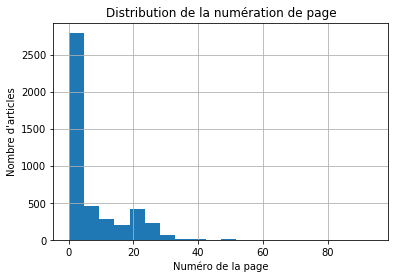

In [7]:
axes = articles.printPage.hist(bins=20)
plt.title('Distribution de la numération de page')
plt.ylabel("Nombre d'articles")
plt.xlabel("Numéro de la page")
plt.show()

Nous constatons que la majorité des articles que nous traitons apparaissent en première page du New York Times. Cela peut reveler un biais lors de la selection des articles dans le jeu de données car les premiers articles génère probablement plus de commentaires et sont donc un sujet d'étude plus intéressant.

##### Etude du rubricage des articles

##### Etude des aperçus d'articles

La difficulté ici consiste a traiter une colonne dont les valeurs correspondent à du texte. La construction de colonnes artificelles pour chaque terme du vocabulaire est malaisé car ce dernier est de grande taille et la tableau ainsi obtenu est très creux. L'analyse sémantique latente permet de résoudre ce problème en regroupant conjointement les articles possédant les même termes et les termes se trouvant dans les même articles.

Afin d'appliquer l'analyse sémantique latente

In [17]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def preprocess_text(texts):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    preprocessed_texts = []
    for text in texts:
        tokens = tokenizer.tokenize(text)
        tokens = [token for token in tokens if token not in en_stop]
        tokens = [p_stemmer.stem(token) for token in tokens]
        preprocessed_texts.append(tokens)
    return preprocessed_texts

def prepare_corpus

preprocessed_texts = preprocess_text(articles.snippet)
print(preprocessed_texts[0])


['one', 'largest', 'photo', 'display', 'time', 'histori', 'peopl', 'fled', 'boko', 'haram', 'requir', 'effort', 'immens']


In [11]:
sentence = sentence + ' 120$'
print(sentence)
tokens = tokenizer.tokenize(sentence)
print(tokens)
tokens = [token.lower() for token in tokens]
tokens = [token for token in tokens if token not in stopwords.words('english')]
print(tokens)

One of the largest photo displays in Times history, of people who have fled Boko Haram, required an effort just as immense. 120$
['One', 'of', 'the', 'largest', 'photo', 'displays', 'in', 'Times', 'history', 'of', 'people', 'who', 'have', 'fled', 'Boko', 'Haram', 'required', 'an', 'effort', 'just', 'as', 'immense', '120']
['one', 'largest', 'photo', 'displays', 'times', 'history', 'people', 'fled', 'boko', 'haram', 'required', 'effort', 'immense', '120']
